In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import nltk
import string
from string import digits
from textblob import TextBlob,Word

In [98]:
def clean_text_data(df,x,is_lower=True,is_punctuation=True,is_stopwords=True,
                    is_stemming=True,special_symbols=['\n'],verbose=True):
    df=df.copy()
    #stopword removal
    stop_word=list(stopwords.words('english'))
    def remove_stopwords(strr):
        toke=list(strr.split(' '))
        return ' '.join([i for i in toke if i not in stop_word])
    
    #punctutaion removal
    def remove_punctuation(strr):
        t_lator=str.maketrans('','',string.punctuation)
        strr=strr.translate(t_lator)
        remove_digits = str.maketrans('', '', digits)
        strr = strr.translate(remove_digits)
        return strr
    
    #stemming
    def stem_tokens(tokens, stemmer=PorterStemmer()):
        copy=str(tokens)
        try:
            stemmed,tokens = [],list(tokens.split(' '))
            return ' '.join([stemmer.stem(item) for item in tokens])
        except:
            return copy
    
    #removing special symbol
    def remove_special_symbol(strr,pat):
        return strr.replace(pat," ")
    
    def clean_extra_whitespace(y):
        for i in range(20):
            y=str(y).replace('  ',' ')
            y=y.strip()
        return y
    
    #Starting cleaning process
    if verbose:
        print("Starting cleaning process")
        if is_lower:
            print('Converting to lower case')
            df[x]=df[x].str.lower()
        if is_punctuation:
            print('Removing Punctuations')
            df[x]=df[x].apply(lambda y:remove_punctuation(y))
        if is_stopwords:
            print('Removing Stopwords')
            df[x]=df[x].apply(lambda y:remove_stopwords(y))
        if is_stemming:
            print('Stemming')
            df[x]=df[x].apply(lambda y:stem_tokens(y))
        print('Removing ',special_symbols)
        for i in special_symbols:
            df[x]=df[x].apply(lambda y:remove_special_symbol(y,i))
        print('Text cleaning has been successfully completed')
        
    else:
        if is_lower:
            df[x]=df[x].str.lower()
        if is_punctuation:
            df[x]=df[x].apply(lambda y:remove_punctuation(y))
        if is_stopwords:
            df[x]=df[x].apply(lambda y:remove_stopwords(y))
        if is_stemming:
            df[x]=df[x].apply(lambda y:stem_tokens(y))
        for i in special_symbols:
            df[x]=df[x].apply(lambda y:remove_special_symbol(y,i))
    df[x]=df[x].apply(lambda y:clean_extra_whitespace(y))    
    return df

In [95]:
def num_of_words(x):
    return len(list(str(x).split(' ')))

In [96]:
train=pd.read_csv('../Data/train.csv')
test=pd.read_csv('../Data/test.csv')
submission=pd.read_csv('../Data/sample_submission.csv')

In [100]:
new_train=clean_text_data(df=train,x='comment_text')

Starting cleaning process
Converting to lower case
Removing Punctuations
Removing Stopwords
Stemming
Removing  ['\n']
Text cleaning has been successfully completed


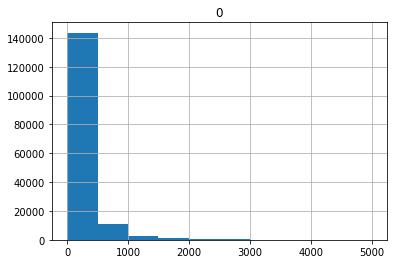

In [105]:
pd.DataFrame([len(i) for i in new_train['comment_text'].values]).hist()
plt.show()

In [147]:
new_train['comment_text_char_length']=[len(i) for i in new_train['comment_text'].values]
new_train['comment_text_word_length']=new_train['comment_text'].apply(lambda x:num_of_words(x))

In [109]:
new_test=clean_text_data(df=test,x='comment_text')

Starting cleaning process
Converting to lower case
Removing Punctuations
Removing Stopwords
Stemming
Removing  ['\n']
Text cleaning has been successfully completed


In [148]:
new_test['comment_text_char_length']=[len(i) for i in new_test['comment_text'].values]
new_test['comment_text_word_length']=new_test['comment_text'].apply(lambda x:num_of_words(x))

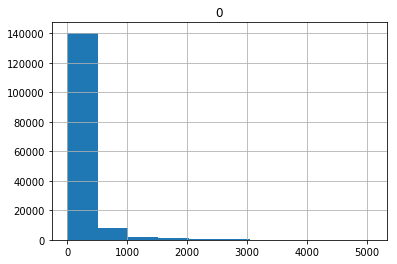

In [117]:
pd.DataFrame([len(i) for i in new_test['comment_text'].values]).hist()
plt.show()

In [144]:
new_train['comment_text'][new_train['comment_text']=='unknown']='O'
new_test['comment_text'][new_test['comment_text']=='unknown']='O'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
train_old=pd.read_csv('../Data/train.csv')
test_old=pd.read_csv('../Data/test.csv')

In [153]:
def polarity(x):
    return TextBlob(x).sentiment.polarity

In [ ]:
# Takes 10 minutees to complete :O
train['polarity']=train_old['comment_text'].apply(lambda x:polarity(x))
test['polarity']=test_old['comment_text'].apply(lambda x:polarity(x))

In [151]:
new_test.to_csv('../Data/cleaned_test.csv',index=False)
new_train.to_csv('../Data/cleaned_train.csv',index=False)